In [33]:
import pandas as pd 
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.combine import SMOTEENN

In [11]:
mobile = pd.read_csv('final.csv')

In [12]:
mobile.head()

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### i noticed that the is raud is related more with  nameDest specifically which start with c charcter,
### i split it to the dest_char column with the first character .the below cells will desicus more

In [13]:
mobile['dest_char'] = mobile['nameDest'].apply(lambda x : x[:1])

In [14]:
# we see that the data between normal customer and the marchat is litte balanced 
mobile['dest_char'].value_counts()

C    28088
M    21912
Name: dest_char, dtype: int64

In [41]:
print(mobile.describe())

         Unnamed: 0          step        amount  oldbalanceOrg  \
count  50000.000000  50000.000000  5.000000e+04   5.000000e+04   
mean   24999.500000      7.453800  1.562645e+05   7.333083e+05   
std    14433.901067      2.056636  3.243949e+05   2.202405e+06   
min        0.000000      1.000000  6.300000e-01   0.000000e+00   
25%    12499.750000      7.000000  7.734572e+03   0.000000e+00   
50%    24999.500000      8.000000  3.341482e+04   1.703072e+04   
75%    37499.250000      9.000000  1.878390e+05   1.331716e+05   
max    49999.000000      9.000000  1.000000e+07   2.854724e+07   

       newbalanceOrig  oldbalanceDest  newbalanceDest       isFraud  \
count    5.000000e+04    5.000000e+04    5.000000e+04  50000.000000   
mean     7.472741e+05    8.444671e+05    1.164400e+06      0.002000   
std      2.239971e+06    2.433388e+06    2.915203e+06      0.044677   
min      0.000000e+00    0.000000e+00    0.000000e+00      0.000000   
25%      0.000000e+00    0.000000e+00    0.000000e

### trying to find hidden patterns of data , found that the fraud is related more with (transfer & cash_out )
#### which make sence as the fraud not appear in payment or debit as shown in below cells  

In [42]:
print(mobile.type.value_counts())

PAYMENT     21912
CASH_OUT    13756
CASH_IN      8992
TRANSFER     4700
DEBIT         640
Name: type, dtype: int64


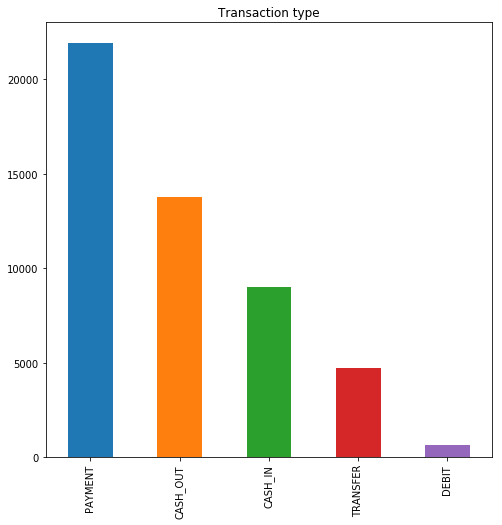

In [8]:
# the number of frequenceies of each type on the payments 
f, ax = plt.subplots(1, 1, figsize=(8, 8))
mobile.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()

## the percent of the fraud to not fraud in each type 

In [9]:
mobile.groupby(['type', 'isFraud']).size()

type      isFraud
CASH_IN   0           8992
CASH_OUT  0          13705
          1             51
DEBIT     0            640
PAYMENT   0          21912
TRANSFER  0           4651
          1             49
dtype: int64

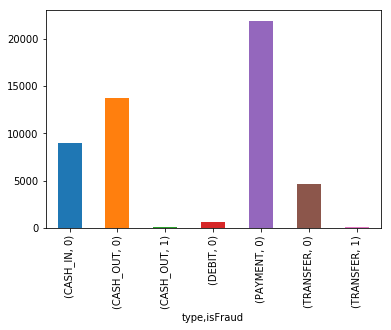

In [10]:
mobile.groupby(['type', 'isFraud']).size().plot(kind = 'bar')

## found that the fraud is related more with (customers not marchant )
## which make sence as the marchant not make his reputation dirty as shown in below cells

In [43]:
mobile.groupby(['dest_char', 'isFraud']).size()

dest_char  isFraud
C          0          27988
           1            100
M          0          21912
dtype: int64

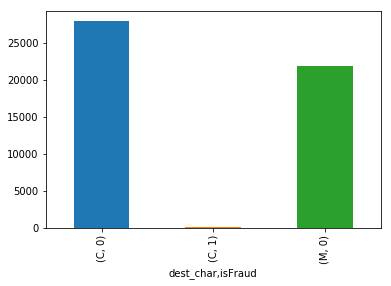

In [44]:
mobile.groupby(['dest_char', 'isFraud']).size().plot(kind = 'bar')

In [32]:
mobile = mobile.drop(columns =['nameDest','nameOrig'], axis =1)

In [35]:
mobile = mobile.drop(columns =['Unnamed: 0','step'], axis =1)


In [38]:
lb = LabelEncoder()
mobile['type'] = lb.fit_transform(mobile['type'])

In [40]:
lb2 = LabelEncoder()
mobile['dest_char'] = lb2.fit_transform(mobile['dest_char'])

In [42]:
#x_not_fraud  = mobile[mobile['isFraud'] == 0] 
#x_fraud  = mobile[mobile['isFraud'] == 1] 

In [57]:
mobile.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,dest_char
0,3,9839.64,170136.0,160296.36,0.0,0.0,0,0,1
1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0,1
2,4,181.00,181.0,0.00,0.0,0.0,1,0,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0
4,3,11668.14,41554.0,29885.86,0.0,0.0,0,0,1


In [43]:
print(x_not_fraud.shape)
print(x_fraud.shape)

(49900, 9)
(100, 9)
